This project tries to predict health insurance charges based on a person's age, sex, bmi, their smoker status, the amount of children they have, and their region of the United States. The original dataset is available of kaggle.com as a .csv file. 

https://www.kaggle.com/mirichoi0218/insurance

# Data Setup

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading in the data
df = pd.read_csv('insurance.csv')

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No missing data. 

# Exploratory Data Analysis

In [3]:
#Getting descriptive statistics of the data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\barbal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges'>

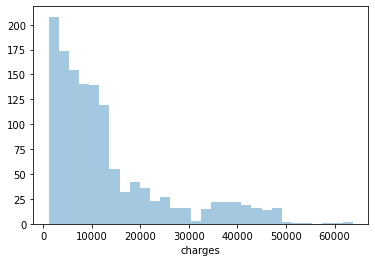

In [4]:
#Histogram of the insurance charges
sns.distplot(df['charges'], kde=False)

The distribution of charges skews right, with most of the charges being below 10,000.

<AxesSubplot:xlabel='charges', ylabel='Density'>

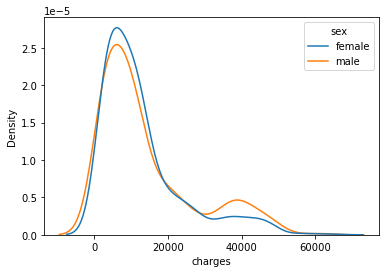

In [5]:
# KDE plot of the insurance charges split out by sex
sns.kdeplot(data=df, x='charges', hue='sex')

Sex does not cause a drastic shift in the distribution of charges.

<AxesSubplot:xlabel='charges', ylabel='Density'>

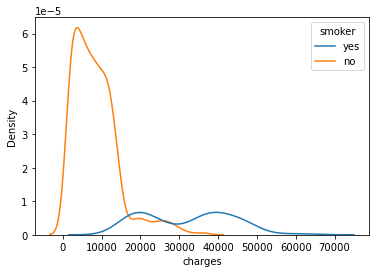

In [6]:
# KDE plot of insurance charges split out by smoker status
sns.kdeplot(data=df, x='charges', hue='smoker')

In [87]:
df.groupby('smoker')['charges'].median()

smoker
no      7345.40530
yes    34456.34845
Name: charges, dtype: float64

Smokers tend to have higher charges than non smokers.

<AxesSubplot:xlabel='charges', ylabel='Density'>

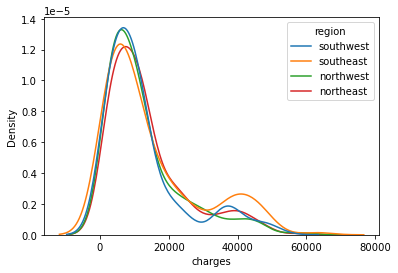

In [7]:
# KDE plot of insurance charges split out by region of the United States
sns.kdeplot(data=df, x='charges', hue='region')

The region of the country does not drastically alter the distribution.

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

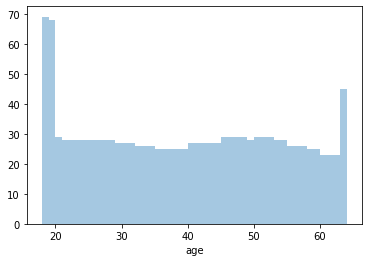

In [8]:
# Histogram of ages in the dataset
sns.distplot(df['age'], kde=False, bins=46)

Many of the people in the dataset are younger than 20. There is a large spike in the 64 year old age group. The people in the dataset are between 18 and 64 years old. Outside of these age groups, the ages are evenly distributed.

<AxesSubplot:xlabel='bmi'>

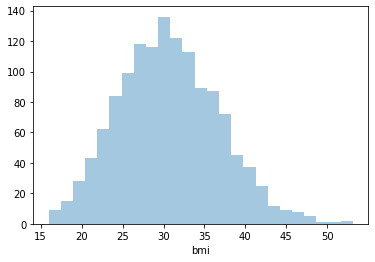

In [9]:
# Histogram of bmi
sns.distplot(df['bmi'], kde=False)

BMI follows a normal distribution centered at 30. 

<AxesSubplot:xlabel='bmi', ylabel='age'>

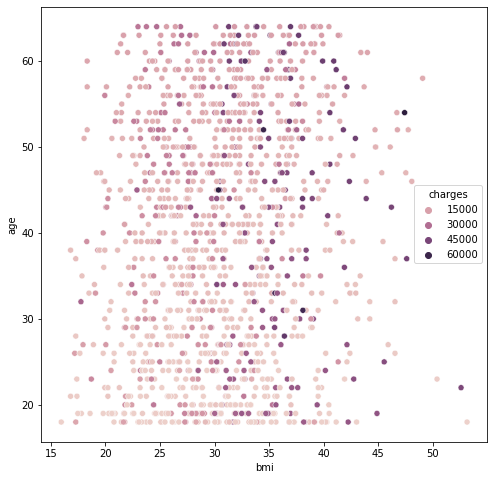

In [10]:
# Scatterplot of bmi and age with insurance charge brackets overlayed
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='bmi', y='age', hue='charges')

People on the lower end of the BMI spectrum tend to have lower insurance charges.

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children'>

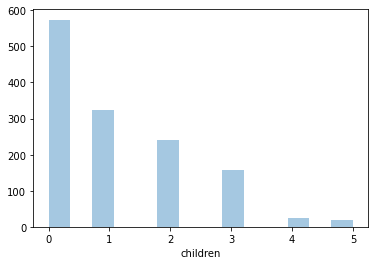

In [11]:
# Histogram of the number of children
sns.distplot(df['children'], kde=False)

Most people in the dataset have only one or no children.

# Machine Learning

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
# Create dummy variables for the categorical data
sex = pd.get_dummies(df['sex'], drop_first=True)
smoker = pd.get_dummies(df['smoker'], drop_first=True)
region = pd.get_dummies(df['region'], drop_first=True)

In [96]:
df.drop(['sex','smoker','region'], axis=1, inplace=True)

In [14]:
# Change categorical data to )s and 1s in the DataFrame
df = pd.concat([df, sex, smoker, region], axis=1)

In [98]:
df.head()

,age,bmi,children,charges,male,yes,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot:>

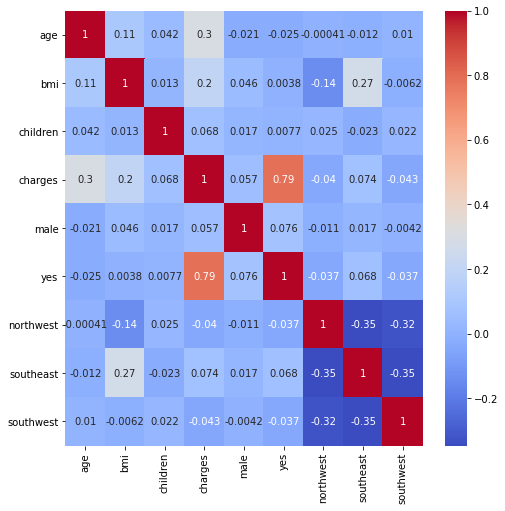

In [15]:
# Print a heatmap of correlation values, charges is the 4th column from the left
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

All the data is numeric and ready to be inputted into a linear regression algorithm.

In [16]:
# Split up features and the values to be predicted
X = df[['age','bmi','children','male','yes','northwest','southeast','southwest']]
y = df['charges']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Performing the training data and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating, training, and using a simple linear regression model

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions = lm.predict(X_test)

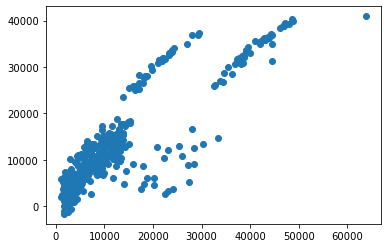

In [22]:
# A straight line with a slope of 1 would indicate perfect predictions
plt.scatter(y_test, predictions)

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

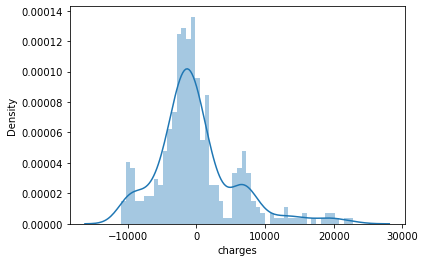

In [25]:
# A normal distribution centered around 0 with a low standard 
# deviation would indicate perfect predictions
sns.distplot((y_test-predictions), bins=50)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [32]:
# Print out the R2 score and Root Mean Squared Error
print('R2 Score: ', cross_val_score(lm, X, y, cv=10, scoring='r2').mean() )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 Score:  0.7445006998667603
RMSE:  5812.10027225887


An R2 Score of 0.74 and Root Mean Squared Error of 5812 are decent, but there may be other algorithms that would improve this score.

In [33]:
# Trying out a Random Forest Regression algorithm
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
rfr_predictions = rfr.predict(X_test)

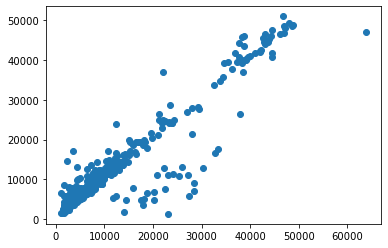

In [36]:
# A straight line with a slope of 1 would indicate perfect predictions
plt.scatter(y_test, rfr_predictions)

C:\Users\barbal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

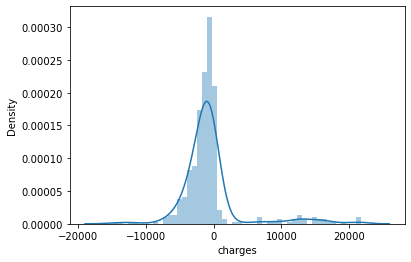

In [37]:
# A normal distribution centered around 0 with a low standard 
# deviation would indicate perfect predictions
sns.distplot((y_test-rfr_predictions), bins=50)

In [38]:
# Print out the R2 score and Root Mean Squared Error of the random forest 
# model
print('R2 Score: ', cross_val_score(rfr, X, y, cv=10, scoring='r2').mean() )
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, rfr_predictions)))

R2 Score:  0.8358287490997995
RMSE:  4578.9990203457055


The R2 Score and Root Mean Squared Error of are much better! 